# Evolution of Z$^{\otimes n}$ Hamiltonian

![title](NielsenChuang.png)

In [5]:
import warnings
warnings.simplefilter('ignore')

In [6]:
import numpy as np
from numpy import pi, sqrt
from qiskit import *
from qiskit.circuit import Gate
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit import Aer

In [7]:
def nphase(qc, n, dt):
    # CNOT
    for j in range(n):
        qc.cx( j, n )
    # apply two qubit phase
    qc.p( dt, n )
    for j in range(n):
        qc.cx( n-j-1, n )

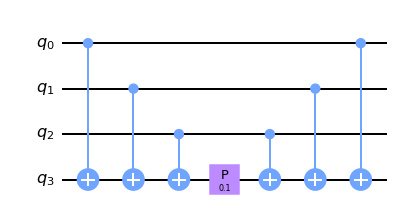

In [21]:
# n=n
n = 3
q = QuantumRegister(n+1, 'q')
qc_n = QuantumCircuit(q)
nphase(qc_n,n,0.1)
qc_n.draw('mpl')

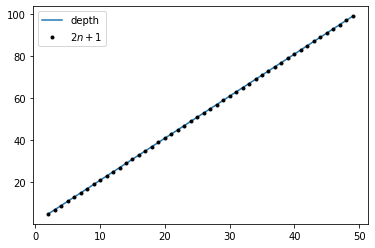

In [20]:
nqubits_lst = np.arange(2,50)
size_lst = nqubits_lst*0
depth_lst = nqubits_lst*0

for i in range(len(nqubits_lst)):
    nqubits = nqubits_lst[i]
    
    q = QuantumRegister(nqubits+1, 'q')
    qc_n = QuantumCircuit(q)
    nphase(qc_n,nqubits,0.1)

    size_lst[i] = qc_n.size()
    depth_lst[i] = qc_n.depth()

# plot
plt.plot(nqubits_lst, depth_lst, label='depth')
#size_lst = depth_lst
plt.plot(nqubits_lst, 2*nqubits_lst+1, 'k.', label=r'$2n+1$')
plt.legend()
plt.show()